In [32]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlsxwriter
import re
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Load the workbook
workbookPath = 'DDS2/DDS2 Cons Dent Assessment - Exam 2 May_June 3, 2024_16.12 tooth36.xlsx'

#get file name
file_name = os.path.basename(workbookPath)
file_name = os.path.splitext(file_name)[0]
dir_name = os.path.dirname(workbookPath)
# workbook = openpyxl.load_workbook(workbookPath, data_only=True)
# sheet = workbook['Sheet0']

# # Read data into a pandas DataFrame
# data = sheet.values
# # Get the first row of headers (to be skipped)
# # next(data)
# # Get the second row as headers
# columns = next(data)

# Create the DataFrame
# df_ = pd.DataFrame(data, columns=columns)

# read the workbook into a pandas DataFrame
df_ = pd.read_excel(workbookPath, sheet_name='Sheet1')  
df_ = df_.drop(index=0)

# Conditions for filtering
nameColF = 'Q1.4'
nameColG = 'Q1.3'
condition1 = (df_[nameColG] == 'Fake') & (df_[nameColF] == 'Person')
condition2 = df_[nameColG].isna() | df_[nameColF].isna()
condition3 = df_[nameColG].eq('') | df_[nameColF].eq('')
condition4 = (df_[nameColG] == 'Test') | (df_[nameColF] == 'McTest')

# Combine all conditions using OR
combined_condition = condition1 | condition2 | condition3 | condition4

# Filter the DataFrame
df_ = df_[~combined_condition]
print(len(df_))

df_['RecordedDate'] = pd.to_datetime(df_['RecordedDate'], format='%d %b %Y').dt.date

# # Filter to keep only the rows where the date is '15 Apr 2024'
target_date = pd.Timestamp('2024-06-03').date()
target_date2 = pd.Timestamp('2024-06-02').date()
df_ = df_[(df_['RecordedDate'] == target_date) | (df_['RecordedDate'] == target_date2)]
print(len(df_))
df_.head(2)


196
196


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.7_112_TEXT,Q1.8,Q2.2_1,Q2.2_2,Q2.2_3,Q2.2_4,Q2.2_5,Q2.2_6,Q2.2_7,Q2.2_8,Q2.2_9,Q2.4_1,Q2.4_2,Q2.5,Q2.6,Q2.8_1,Q2.8_2,Q2.8_3,Q2.8_4,Q2.8_5,Q2.8_6,Q2.10_1,Q2.10_2,Q2.11,Q2.12,Q3.1,Q3.2,Q3.3,Q3.4,Q3.6_Id,Q3.6_Name,Q3.6_Size,Q3.6_Type,gname,fname,uomid,Station Score,circuit,ToothNumber
1,2024-06-02 19:14:16,2024-06-02 19:16:51,IP Address,128.250.0.36,100,155,True,2024-06-02,R_47PxolsEZCW9g92,NaN,NaN,NaN,NaN,-37.8159,144.9669,anonymous,EN,3 Jun 2024,Olivia,Mairinger,1420083,TOOTH 36: 513 Metallic Checklist and 577 Cusp ...,Martin Tyas,NaN,"Yes, student attended",Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 4: Student can be trusted to perform this ...,Good result,F_1r2Z20wqLL7hqGC,signature.png,6420,image/png,Olivia,Mairinger,1420083,NaN,exam,36
2,2024-06-02 19:13:12,2024-06-02 19:17:40,IP Address,128.250.0.35,100,268,True,2024-06-02,R_4Kb4OrkyPmgQqrL,NaN,NaN,NaN,NaN,-37.8159,144.9669,anonymous,EN,3 Jun 2024,Seyeon Evelyn,Park,1083971,TOOTH 36: 513 Metallic Checklist and 577 Cusp ...,Melinda Johansson,NaN,"Yes, student attended",Completed,Completed,Completed,Completed,Completed,Completed,Not completed,Completed,Completed,Completed,Completed,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 2: Student can be trusted to perform task ...,Sharp lingual approx line angle,F_2400X62yAW9EcPW,signature.png,2811,image/png,Seyeon Evelyn,Park,1083971,NaN,exam,36


In [33]:
ids = df_['Q1.5'].unique()
print(len(ids))

98


In [34]:
# # # Convert the 'date' column to datetime
# df_['RecordedDate'] = pd.to_datetime(df_['RecordedDate'], format='%d %b %Y').dt.date

# # # Filter to keep only the rows where the date is '15 Apr 2024'
# target_date = pd.Timestamp('2024-06-03').date()
# df_ = df_[df_['RecordedDate'] == target_date]

In [35]:
# def extractToothNumber(description):
#     match = re.search(r'\bTOOTH (\d+)\b', description)
#     return match.group(1) if match else None

# df_['ToothNumber'] = df_['Q1.6'].apply(extractToothNumber)

In [36]:
# dftooth36 = df_[df_['ToothNumber']=='36']
# dftooth37 = df_[df_['ToothNumber']=='37']
# print(len(dftooth36), len(dftooth37))

In [37]:
# dftooth36.to_excel(f'{dir_name}/{file_name} tooth36.xlsx', index=False)
# dftooth37.to_excel(f'{dir_name}/{file_name} tooth37.xlsx', index=False)

Change the name of columns to something readable

In [38]:
df = df_.copy()
# collect student id and examiner for empty Q3.6_Id
df['Q3.6_Id'] = df['Q3.6_Id'].fillna('')
df['Q3.6_Id'] = df['Q3.6_Id'].replace(' ', '')
df['Q3.6_Id'] = df['Q3.6_Id'].replace('  ', '')
emptyQ3_6 = df[df['Q3.6_Id'].eq('')][['uomid', 'Q1.7']]
# drop the columns with nan or empty in Q3.6_Id
df = df[~df['Q3.6_Id'].eq('')]
code1 = '513'
code2 = '577'

# tooth36
quesLabelDict = {
    f'Q2.2_1': f'{code1}_MC1', f'Q2.2_2': f'{code1}_MC2', f'Q2.2_3': f'{code1}_MC3', f'Q2.2_4': f'{code1}_MC4', f'Q2.2_5': f'{code1}_MC5', f'Q2.2_6': f'{code1}_MC6', f'Q2.2_7': f'{code1}_MC7', f'Q2.2_8': f'{code1}_MC8', f'Q2.2_9': f'{code1}_MC9',
    f'Q2.4_1': f'{code2}_MC1', 'Q2.4_2': f'{code2}_MC2',
    f'Q2.5': f'{code1}_CE',
    'Q3.1': 'TM', 'Q3.2': 'PS', 'Q3.3': 'ES',
    'Q1.7': 'Examiner', 'Q1.5': 'StudentID', 'Duration (in seconds)': 'Duration', 'Progress': 'Progress', 
    'Finished': 'Finished', 'Q1.2': 'Date', 'Q3.4': 'Comments', 'Q1.6': 'Description'
}

#tooth37
# quesLabelDict = {
#     f'Q2.2_1': f'{code1}_MC1', f'Q2.2_2': f'{code1}_MC2', f'Q2.2_3': f'{code1}_MC3', f'Q2.2_4': f'{code1}_MC4', f'Q2.2_5': f'{code1}_MC5', f'Q2.2_6': f'{code1}_MC6', f'Q2.2_7': f'{code1}_MC7', f'Q2.2_8': f'{code1}_MC8', f'Q2.2_9': f'{code1}_MC9',
#     f'Q2.4_1': f'{code2}_MC1', 'Q2.4_2': f'{code2}_MC2',
#     f'Q2.8_1': f'{code2}_MC1', f'Q2.8_2': f'{code2}_MC2', f'Q2.8_3': f'{code2}_MC3', f'Q2.8_4': f'{code2}_MC4', f'Q2.8_5': f'{code2}_MC5', f'Q2.8_6': f'{code2}_MC6', f'Q2.10_1': f'{code2}_MC7', f'Q2.10_2': f'{code2}_MC8',
#     f'Q2.5': f'{code1}_CE', f'Q2.11': f'{code2}_CE',
#     'Q3.1': 'TM', 'Q3.2': 'PS', 'Q3.3': 'ES',
#     'Q1.7': 'Examiner', 'Q1.5': 'StudentID', 'Duration (in seconds)': 'Duration', 'Progress': 'Progress', 
#     'Finished': 'Finished', 'Q1.2': 'Date', 'Q3.4': 'Comments', 'Q1.6': 'Description'
# }

quesType = {
    'level': ['TM', 'PS', 'ES'],
    'yesNo':['534_CE', '524_CE'],
    'MC': [colname for colname in quesLabelDict.values() if 'MC' in colname],
}
df.rename(columns=quesLabelDict, inplace=True) # rename the columns

def extractToothNumber(description):
    match = re.search(r'\bTOOTH (\d+)\b', description)
    return match.group(1) if match else None

# Create a new column with the extracted tooth number


df = df[list(quesLabelDict.values())]
df['ToothNumber'] = df['Description'].apply(extractToothNumber)
df.drop(columns=['Description'], inplace=True)
# # Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y').dt.date

# # # Filter to keep only the rows where the date is '15 Apr 2024'
# target_date = pd.Timestamp('2024-06-03').date()
# df = df[df['Date'] == target_date]

df[f'{code2}_CE'] = df[f'{code1}_CE']
print(len(df))
df.head(5)

196


,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,513_MC7,513_MC8,513_MC9,577_MC1,577_MC2,513_CE,TM,PS,ES,Examiner,StudentID,Duration,Progress,Finished,Date,Comments,ToothNumber,577_CE
1,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 4: Student can be trusted to perform this ...,Martin Tyas,1420083,155,100,True,2024-06-03,Good result,36,No
2,Completed,Completed,Completed,Completed,Completed,Completed,Not completed,Completed,Completed,Completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 2: Student can be trusted to perform task ...,Melinda Johansson,1083971,268,100,True,2024-06-03,Sharp lingual approx line angle,36,No
3,Completed,Not completed,Completed,Completed,Completed,Completed,Completed,Completed,Not completed,Completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 3: Student can be trusted to perform task ...,Jyoti Anand,1383423,264,100,True,2024-06-03,Small amount of damage to 35D\nSlight extensio...,36,No
4,Not completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Not completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 3: Student can be trusted to perform task ...,Grace Pang,1082185,306,100,True,2024-06-03,D end of cusp reduction not quite 2mm,36,No
5,Not completed,Completed,Completed,Completed,Completed,Not completed,Completed,Not completed,Completed,Not completed,Not completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 2: Student can be trusted to perform task ...,Evelyn Chan,1113227,543,100,True,2024-06-03,Mesial box rough margins\nUnder reduced mid oc...,36,No


In [39]:
df[df['Examiner']=='Martin Tyas']['StudentID'].value_counts()

StudentID
1399220    2
1383423    2
1420083    1
1170752    1
1384390    1
1402031    1
1399214    1
617915     1
1371861    1
587525     1
1221853    1
1171988    1
1420096    1
1394124    1
1394580    1
1232770    1
1187046    1
1388600    1
1173430    1
1377158    1
1420122    1
1389354    1
1402789    1
1085148    1
1082018    1
1084831    1
1113227    1
1387067    1
1384391    1
Name: count, dtype: int64

In [40]:

# df = df.drop(index = [596, 599])
df[df['StudentID']== 1399220][ df['Examiner']=='Martin Tyas']

,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,513_MC7,513_MC8,513_MC9,577_MC1,577_MC2,513_CE,TM,PS,ES,Examiner,StudentID,Duration,Progress,Finished,Date,Comments,ToothNumber,577_CE
12,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 4: Student can be trusted to perform this ...,Martin Tyas,1399220,85,100,True,2024-06-03,Good result,36,No
87,Completed,Completed,Completed,Completed,Not completed,Completed,Completed,Completed,Completed,Completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 4: Student can be trusted to perform this ...,Martin Tyas,1399220,130,100,True,2024-06-03,Reasonable prep but ? Non- retentive\n,36,No


In [41]:
df[df['StudentID']==1383423][ df['Examiner']=='Martin Tyas']

,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,513_MC7,513_MC8,513_MC9,577_MC1,577_MC2,513_CE,TM,PS,ES,Examiner,StudentID,Duration,Progress,Finished,Date,Comments,ToothNumber,577_CE
36,Completed,Completed,Completed,Completed,Completed,Completed,Completed,Not completed,Completed,Not completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 3: Student can be trusted to perform task ...,Martin Tyas,1383423,107,100,True,2024-06-03,Inadequate cusp reduction \nSome roughness of ...,36,No
84,Completed,Completed,Completed,Completed,Not completed,Completed,Completed,Completed,Completed,Not completed,Completed,No,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 2: Student can be trusted to perform task ...,Martin Tyas,1383423,105,100,True,2024-06-03,Excessive cusp reduction \nNon retentive,36,No


In [42]:
df = df.drop(index = [36, 12])

Turn examiner name to initials

In [43]:
# Function to convert names to initials
def get_initials(name):
    parts = name.split(' ')
    initials = ''.join([part[0].upper() for part in parts])
    return initials
# Apply the function to the 'Examiner' column
df['Examiner'] = df['Examiner'].apply(get_initials)

# Extract Level digits
df['TM'] = df['TM'].str.extract(r'Lvl (\d+)')
df['PS'] = df['PS'].str.extract(r'Lvl (\d+)')
df['ES'] = df['ES'].str.extract(r'Lvl (\d+)')
# Change values of completed tasks to 1.
df.replace({'Completed': 1, 'Not completed': 0}, inplace=True)
df.head()

,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,513_MC7,513_MC8,513_MC9,577_MC1,577_MC2,513_CE,TM,PS,ES,Examiner,StudentID,Duration,Progress,Finished,Date,Comments,ToothNumber,577_CE
1,1,1,1,1,1,1,1,1,1,1,1,No,3,2,4,MT,1420083,155,100,True,2024-06-03,Good result,36,No
2,1,1,1,1,1,1,0,1,1,1,1,No,3,2,2,MJ,1083971,268,100,True,2024-06-03,Sharp lingual approx line angle,36,No
3,1,0,1,1,1,1,1,1,0,1,1,No,3,2,3,JA,1383423,264,100,True,2024-06-03,Small amount of damage to 35D\nSlight extensio...,36,No
4,0,1,1,1,1,1,1,1,1,0,1,No,3,2,3,GP,1082185,306,100,True,2024-06-03,D end of cusp reduction not quite 2mm,36,No
5,0,1,1,1,1,0,1,0,1,0,0,No,3,2,2,EC,1113227,543,100,True,2024-06-03,Mesial box rough margins\nUnder reduced mid oc...,36,No


In [44]:
# divide the df based on tooth number
tooth_numbers = df['ToothNumber'].unique()
dfs_tooth = {}
for tooth_number in tooth_numbers:
    dfs_tooth[tooth_number] = df[df['ToothNumber'] == tooth_number]
    print(f"Tooth {tooth_number}: {dfs_tooth[tooth_number].shape[0]}")

Tooth 36: 194


In [45]:
# Columns associated with 534 and 524 (group the columns based on their properties)
def mergerows(df):
    cols_534 = [col for col in df.columns if code1 in col]
    cols_524 = [col for col in df.columns if code2 in col]
    print(cols_534)
    print(cols_524)
    # Splitting the DataFrame based on empty string criteria
    df_534 = df[df[f'{code1}_MC1'].notnull()]
    df_524 = df[df[f'{code2}_MC1'].notnull()]
    print(len(df_534), len(df_524))
    df_534 = df_534.drop(cols_524, axis=1)
    df_524 = df_524.drop(cols_534, axis=1)

    # Create a new index by combining StudentID and Examiner
    df_534['new_index'] = df_534['StudentID'].astype(str) + '_' + df_534['Examiner']
    df_524['new_index'] = df_524['StudentID'].astype(str) + '_' + df_524['Examiner']

    # Set the new column as the index
    df_534.set_index('new_index', inplace=True)
    df_524.set_index('new_index', inplace=True)

    # rename the common columns
    df_534 = df_534.rename(columns=lambda x: f'{code1}_{x}' if x in ['TM', 'PS', 'ES', 'Duration', 'Progress', 'Finished', 'Comments'] else x)
    df_524 = df_524.rename(columns=lambda x:  f'{code2}_{x}' if x in ['TM', 'PS', 'ES', 'Duration', 'Progress', 'Finished', 'Comments'] else x)
    df_merged = df_534.merge(df_524, left_index=True, right_index=True, how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
    df_merged.head(3)
    df_merged.reset_index(inplace=True)
    df_merged.rename(columns={'new_index': 'Row Labels'}, inplace=True) # change the index to row labels

    # get any empty rows
    empty_rows = df_merged[df_merged.isnull().any(axis=1)]
    print(empty_rows)
    return df_merged

# Merge the rows
dfs_tooth_merged = {}
for tooth_number in tooth_numbers:
    dfs_tooth_merged[tooth_number] = mergerows(dfs_tooth[tooth_number])


['513_MC1', '513_MC2', '513_MC3', '513_MC4', '513_MC5', '513_MC6', '513_MC7', '513_MC8', '513_MC9', '513_CE']
['577_MC1', '577_MC2', '577_CE']
194 194
Empty DataFrame
Columns: [Row Labels, 513_MC1, 513_MC2, 513_MC3, 513_MC4, 513_MC5, 513_MC6, 513_MC7, 513_MC8, 513_MC9, 513_CE, 513_TM, 513_PS, 513_ES, Examiner, StudentID, 513_Duration, 513_Progress, 513_Finished, Date, 513_Comments, ToothNumber, 577_MC1, 577_MC2, 577_TM, 577_PS, 577_ES, 577_Duration, 577_Progress, 577_Finished, 577_Comments, 577_CE]
Index: []


Merge the cells together

Create different dataframe for each examiner

In [46]:
# filter the dataframe
df_merged['Comments'] = f'{code1}: ' + df_merged[f'{code1}_Comments'].fillna('') + f';\n{code2}: ' + df_merged[f'{code2}_Comments'].fillna('')
df_merged = df_merged.drop(['StudentID', 'Examiner', f'{code1}_Progress', f'{code1}_Finished', f'{code1}_Duration', 
                              f'{code2}_Progress', f'{code2}_Finished', f'{code2}_Duration', 'Date', f'{code1}_Comments', f'{code2}_Comments'], axis=1)

df_merged[['StudentID', 'Examiner']] = df_merged['Row Labels'].str.split('_', expand=True)

# Dictionary to hold each DataFrame
dfs = {}
# Splitting the DataFrame based on unique examiner values
for examiner in df_merged['Examiner'].unique():
    dfs[examiner] = df_merged[df_merged['Examiner'] == examiner]
examiners = df_merged['Examiner'].unique()

# Number of students checked by examiners
for examiner in examiners:
    print(f"Examiner {examiner}: {dfs[examiner].shape[0]}")



NameError: name 'df_merged' is not defined

In [ ]:
df_merged[df_merged['StudentID']== '1399220']

,Row Labels,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,513_MC7,513_MC8,513_MC9,513_MC10,513_MC11,513_CE,513_TM,513_PS,513_ES,ToothNumber,577_MC1,577_MC2,577_MC3,577_MC4,577_MC5,577_MC6,577_MC7,577_MC8,577_CE,577_TM,577_PS,577_ES,Comments,StudentID,Examiner
149,1399220_JA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,No,3,2,3,36,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,No,3,2,3,513: Very slightly short of 2mm at isthmus tow...,1399220,JA
150,1399220_MT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,3,2,4,36,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,No,3,2,3,513: Good result;\n577: Occlusal and ridge-fos...,1399220,MT


In [ ]:
df_merged.head(15)

,Row Labels,513_MC1,513_MC2,513_MC3,513_MC4,513_MC5,513_MC6,513_MC7,513_MC8,513_MC9,513_MC10,513_MC11,513_CE,513_TM,513_PS,513_ES,ToothNumber,577_MC1,577_MC2,577_MC3,577_MC4,577_MC5,577_MC6,577_MC7,577_MC8,577_CE,577_TM,577_PS,577_ES,Comments,StudentID,Examiner
0,1027970_EC,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Yes,3,2,1,36,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,No,3,2,2,513: DEJ around occlusal caries not clear\nUnd...,1027970,EC
1,1027970_MT,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Yes,3,2,2,36,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Yes,3,2,2,513: Prep too shallow and not retentive\nCarie...,1027970,MT
2,1031163_GP,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,Yes,3,2,2,36,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,No,3,2,2,513: Caries d dej\nShatp e margin ml\nShallow ...,1031163,GP
3,1031163_MT,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Yes,3,2,2,36,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Yes,3,2,2,513: Insufficent prep to remove caries from DE...,1031163,MT
4,1064909_GP,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,No,3,2,3,36,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,No,3,2,3,513: Reductn in the middle bit pointy so it wo...,1064909,GP
5,1064909_MT,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,No,3,2,3,36,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,No,3,2,3,513: Damage to five\nExcessive lingual removal...,1064909,MT
6,1069842_GP,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,No,3,2,3,36,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,No,3,2,2,513: Mb cusp bit undermined\nVut into dl cusp\...,1069842,GP
7,1069842_MJ,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,No,1,2,1,36,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,No,3,2,2,513: Looks like second plane of cusp reduction...,1069842,MJ
8,1079663_EC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,No,3,2,3,36,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,No,3,2,3,513: Rough box margin;\n577: Lingual wall roug...,1079663,EC
9,1079663_MT,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,No,3,2,3,36,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,No,3,2,2,513: Rough proximal box;\n577: Porosites in cu...,1079663,MT


{'EC': {'577_CE': 2, '513_CE': 7}, 'MT': {'577_CE': 7, '513_CE': 8}, 'GP': {'577_CE': 0, '513_CE': 6}, 'MJ': {'577_CE': 4, '513_CE': 3}, 'JA': {'577_CE': 7, '513_CE': 5}}


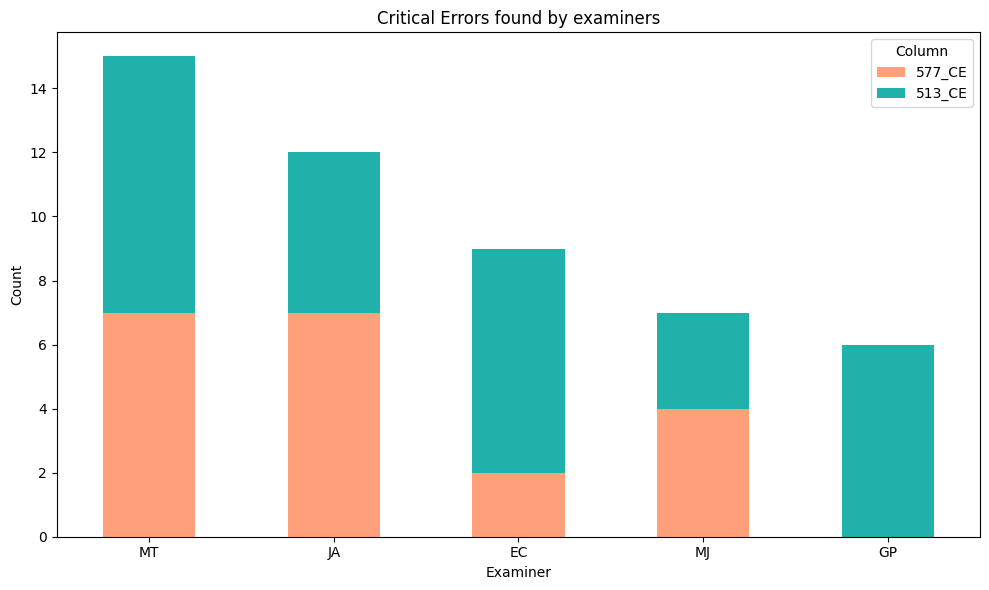

In [ ]:
# Count 'Yes' in specific columns for each examiner
yes_counts = {}
for examiner, dataframe in dfs.items():
    count_524_ce = dataframe[f'{code2}_CE'].value_counts().get('Yes', 0)
    count_534_ce = dataframe[f'{code1}_CE'].value_counts().get('Yes', 0)
    yes_counts[examiner] = {f'{code2}_CE': count_524_ce, f'{code1}_CE': count_534_ce}

# Display the counts
print(yes_counts)
counts_df = pd.DataFrame.from_dict(yes_counts, orient='index')
counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)
counts_df.drop(columns='Total', inplace=True)  # Drop the total as it's no longer needed for plotting

# Plotting
ax=counts_df.plot(kind='bar', figsize=(10, 6), color=['#FFA07A', '#20B2AA'], rot=0, stacked=True)
plt.title('Critical Errors found by examiners')
plt.xlabel('Examiner')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Column')
plt.tight_layout()
# Annotating numbers on top of each bar
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Get the stats, for total only MC values are considered

In [ ]:
import os
from openpyxl import load_workbook
def get_column_letter(col_idx):
        column = ""
        while col_idx > 0:
            col_idx, remainder = divmod(col_idx - 1, 26)
            column = chr(65 + remainder) + column
        return column

def saveDf(df, path, sheet_name):
    writer = pd.ExcelWriter(path, engine='xlsxwriter')  
    df.to_excel(writer, sheet_name=sheet_name, index=True)
    workbook  = writer.book                 # Get the xlsxwriter workbook and worksheet objects.
    worksheet = writer.sheets[sheet_name]

    # Define a format object for red color fill with XlsxWriter.
    red_format = workbook.add_format({'bg_color': '#FFC7CE', 'font_color': '#CF2D06'})
    ce524_format = workbook.add_format({'bg_color': '#D7BDE2', 'font_color': '#000000'}) #purple
    

    # Apply the format based on a conditional rule (cell value == 1).
    for idx, col in enumerate(df.columns, 1):
        column_letter = get_column_letter(idx)
        # print(column_letter)
        worksheet.conditional_format(f'{column_letter}2:{column_letter}{len(df)+1}', {
            'type': 'cell',
            'criteria': '=',
            'value': 1,
            'format': red_format
        })
        
    # Conditional formatting whether CE is Yes in 534 or 524
    num_cols = len(df.columns)
    column_letters = [get_column_letter(i+1) for i in range(num_cols)]
    for row_idx in range(2, len(df) + 2):  # Adjust for header and 1-based indexing
        # Format condition to check in specified columns
        # print(get_column_letter(df.columns.get_loc("534_CE") + 1), get_column_letter(df.columns.get_loc("524_CE") + 1))
        condition_524 = f'OR(${get_column_letter(df.columns.get_loc(f"{code1}_CE") + 2)}{row_idx}="Yes", ${get_column_letter(df.columns.get_loc(f"{code2}_CE") + 2)}{row_idx}="Yes")'
        print(row_idx, condition_524)
        # Apply formatting to the whole row
        worksheet.conditional_format(f'{column_letters[0]}{row_idx}', {
            'type': 'formula',
            'criteria': condition_524,
            'format': ce524_format
        })
    writer.close()

In [ ]:

df = df_merged
def vectoriseColumn(columnName):
    df[columnName] = df[columnName].fillna(0).astype(int)
    for i in range(1, 5):
        df[f'{columnName}-{i}'] = (df[columnName] >= i).astype(int)
# Vectorise columns
vectoriseColumn(f'{code1}_ES')
vectoriseColumn(f'{code1}_PS')
vectoriseColumn(f'{code1}_TM')
vectoriseColumn(f'{code2}_ES')
vectoriseColumn(f'{code2}_PS')
vectoriseColumn(f'{code2}_TM')

# Drop the specified columns
df = df.drop([f'{code1}_ES', f'{code1}_PS', f'{code1}_TM', f'{code2}_ES', f'{code2}_PS', f'{code2}_TM'], axis=1)

# Collect columns of specific type
cols_code1_mc = df.filter(regex=f'^{code1}_MC').columns
cols_code2_mc = df.filter(regex=f'^{code2}_MC').columns
cols_code1_tm = df.filter(regex=f'^{code1}_TM').columns
cols_code2_tm = df.filter(regex=f'^{code2}_TM').columns
cols_code1_es = df.filter(regex=f'^{code1}_ES').columns
cols_code2_es = df.filter(regex=f'^{code2}_ES').columns
cols_code1_ps = df.filter(regex=f'^{code1}_PS').columns
cols_code2_ps = df.filter(regex=f'^{code2}_PS').columns

# Combine column lists
mc_columns = cols_code1_mc.tolist() + cols_code2_mc.tolist()
calc_columns = mc_columns + cols_code1_tm.tolist() + cols_code2_tm.tolist() + cols_code1_es.tolist() + cols_code2_es.tolist() + cols_code1_ps.tolist() + cols_code2_ps.tolist()
print(calc_columns)



def calcTotal(df):
    # Calculate 'Grand Total' and 'Grand Total MC'
    df['Grand Total'] = df[calc_columns].sum(axis=1, skipna=True)
    df['Grand Total MC'] = df[mc_columns].sum(axis=1, skipna=True)

    # Sort values by 'Grand Total'
    df = df.sort_values(by='Grand Total', ascending=False)

    # Set index to 'Row Labels'
    df.set_index('Row Labels', inplace=True)

    # Calculate column totals
    column_totals = df[calc_columns].sum(skipna=True)
    df.loc['Column Total'] = pd.Series(column_totals, index=calc_columns)

    # Sort columns by 'Column Total'
    df = df.sort_values(by='Column Total', axis=1, ascending=False)

    # Get unique student IDs
    ce_code2 = df[df[f'{code2}_CE'] == 'Yes']['StudentID'].unique
    ce_code1 = df[df[f'{code1}_CE'] == 'Yes']['StudentID'].unique
    # print(f"CE 524: {ce_524}")
    # print(f"CE 534: {ce_534}")
    comment = df.pop('Comments')
    df['Comments'] = comment
df.tail()


['524_MC1', '524_MC2', '524_MC3', '524_MC4', '524_MC5', '524_MC6', '578_MC1', '578_MC2', '578_MC3', '524_TM-1', '524_TM-2', '524_TM-3', '524_TM-4', '578_TM-1', '578_TM-2', '578_TM-3', '578_TM-4', '524_ES-1', '524_ES-2', '524_ES-3', '524_ES-4', '578_ES-1', '578_ES-2', '578_ES-3', '578_ES-4', '524_PS-1', '524_PS-2', '524_PS-3', '524_PS-4', '578_PS-1', '578_PS-2', '578_PS-3', '578_PS-4']


,578_TM-1,524_ES-1,578_PS-1,578_ES-1,524_TM-1,524_PS-1,578_PS-2,524_PS-2,524_ES-2,578_ES-2,524_TM-2,578_TM-2,524_MC6,524_MC4,524_MC3,578_MC1,578_MC3,578_ES-3,524_ES-3,524_TM-3,578_TM-3,524_MC2,578_MC2,524_MC1,524_MC5,578_ES-4,524_ES-4,578_PS-4,524_PS-4,578_PS-3,524_TM-4,524_PS-3,578_TM-4,524_CE,578_CE,StudentID,Examiner,Grand Total,Grand Total MC,Comments
Row Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1387538_SM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,1387538,SM,12.0,2.0,524: Ensure you remove burs from hand piece. D...
1472540_LJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,1472540,LJ,12.0,2.0,"524: Restoration is flared buccally, this woul..."
1472447_SB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,1472447,SB,11.0,3.0,524: multiple surfaces of adjacent tooth has b...
1472717_SB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,1472717,SB,11.0,1.0,524: excess composite present required more po...
Column Total,118.0,118.0,118.0,118.0,118.0,118.0,113.0,113.0,110.0,110.0,107.0,107.0,103.0,101.0,89.0,78.0,76.0,70.0,70.0,69.0,69.0,67.0,45.0,41.0,32.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_save_full = df.drop(columns=['StudentID', 'Examiner'], errors='ignore')

saveDf(df_save_full, f'{dir_name}/{file_name} filtered.xlsx', 'Full')

2 OR($AI2="Yes", $AJ2="Yes")
3 OR($AI3="Yes", $AJ3="Yes")
4 OR($AI4="Yes", $AJ4="Yes")
5 OR($AI5="Yes", $AJ5="Yes")
6 OR($AI6="Yes", $AJ6="Yes")
7 OR($AI7="Yes", $AJ7="Yes")
8 OR($AI8="Yes", $AJ8="Yes")
9 OR($AI9="Yes", $AJ9="Yes")
10 OR($AI10="Yes", $AJ10="Yes")
11 OR($AI11="Yes", $AJ11="Yes")
12 OR($AI12="Yes", $AJ12="Yes")
13 OR($AI13="Yes", $AJ13="Yes")
14 OR($AI14="Yes", $AJ14="Yes")
15 OR($AI15="Yes", $AJ15="Yes")
16 OR($AI16="Yes", $AJ16="Yes")
17 OR($AI17="Yes", $AJ17="Yes")
18 OR($AI18="Yes", $AJ18="Yes")
19 OR($AI19="Yes", $AJ19="Yes")
20 OR($AI20="Yes", $AJ20="Yes")
21 OR($AI21="Yes", $AJ21="Yes")
22 OR($AI22="Yes", $AJ22="Yes")
23 OR($AI23="Yes", $AJ23="Yes")
24 OR($AI24="Yes", $AJ24="Yes")
25 OR($AI25="Yes", $AJ25="Yes")
26 OR($AI26="Yes", $AJ26="Yes")
27 OR($AI27="Yes", $AJ27="Yes")
28 OR($AI28="Yes", $AJ28="Yes")
29 OR($AI29="Yes", $AJ29="Yes")
30 OR($AI30="Yes", $AJ30="Yes")
31 OR($AI31="Yes", $AJ31="Yes")
32 OR($AI32="Yes", $AJ32="Yes")
33 OR($AI33="Yes", $AJ33="Yes")


In [ ]:
c1 = calc_columns.copy()
c1.append('StudentID')
c1.append(f'{code1}_CE')
c1.append(f'{code2}_CE')
c1.append('Comments')
# below is to take the best value for df 
df_best = df[c1]
# Step 1: Identify disagreements for each code and create new columns
df_best['Disagreement_Code1'] = df_best.groupby('StudentID')[f'{code1}_CE'].transform(lambda x: x.nunique() > 1)
df_best['Disagreement_Code2'] = df_best.groupby('StudentID')[f'{code2}_CE'].transform(lambda x: x.nunique() > 1)

# Step 3: Store the rows with disagreements in a separate DataFrame
disagreed_rows = df_best[df_best['Disagreement_Code1'] | df_best['Disagreement_Code2']]

# Step 2: Update the critical error columns to 'Yes' if any of the rows for a student have 'Yes'
df_best[f'{code1}_CE'] = df_best.groupby('StudentID')[f'{code1}_CE'].transform(lambda x: 'Yes' if 'Yes' in x.values else 'No')
df_best[f'{code2}_CE'] = df_best.groupby('StudentID')[f'{code2}_CE'].transform(lambda x: 'Yes' if 'Yes' in x.values else 'No')


# Custom aggregation function to concatenate comments
def concatenate_comments(series):
    return ';\n\n '.join(series.dropna().astype(str))

# Group by StudentID and apply the aggregation functions
# Use a dictionary comprehension to set 'max' for all columns except 'Comments'
aggregation_functions = {col: 'max' for col in df_best.columns if col != 'Comments' or col!='StudentID'}
aggregation_functions['Comments'] = concatenate_comments
aggregation_functions['StudentID'] = 'first'
# Apply the aggregation
df_best = df_best.groupby('StudentID').agg(aggregation_functions)#.reset_index(drop=True)

# df_best = df_best.groupby('StudentID').max().reset_index() # take best value
# import ace_tools as tools; tools.display_dataframe_to_user(name="Disagreed Rows", dataframe=disagreed_rows)

# df = df_best
# df_best.head()
# resultDf = resultDf.drop([dropcol], axis=1)
df_best['Grand Total'] = df_best[calc_columns].sum(axis=1, skipna=True)
df_best = df_best.sort_values(by='Grand Total', ascending=False)
df_best.set_index('StudentID', inplace=True)
# df = df.drop(['Examiner', 'Row Labels'], axis=1)

# calculating a column total
column_totals = df_best[calc_columns].sum(skipna=True)  # Sum each column, ignoring NaN
df_best.loc['Column Total'] = pd.Series(column_totals, index=calc_columns)
df_best = df_best.sort_values(by='Column Total', axis=1, ascending=False)
df_best.pop('Disagreement_Code1')
df_best.pop('Disagreement_Code2')
comments = df_best.pop('Comments')
df_best['Comments'] = comments
saveDf(df_best, f'{dir_name}/{file_name} filtered_best.xlsx', 'Best')
df_best.tail()

2 OR($AI2="Yes", $AJ2="Yes")
3 OR($AI3="Yes", $AJ3="Yes")
4 OR($AI4="Yes", $AJ4="Yes")
5 OR($AI5="Yes", $AJ5="Yes")
6 OR($AI6="Yes", $AJ6="Yes")
7 OR($AI7="Yes", $AJ7="Yes")
8 OR($AI8="Yes", $AJ8="Yes")
9 OR($AI9="Yes", $AJ9="Yes")
10 OR($AI10="Yes", $AJ10="Yes")
11 OR($AI11="Yes", $AJ11="Yes")
12 OR($AI12="Yes", $AJ12="Yes")
13 OR($AI13="Yes", $AJ13="Yes")
14 OR($AI14="Yes", $AJ14="Yes")
15 OR($AI15="Yes", $AJ15="Yes")
16 OR($AI16="Yes", $AJ16="Yes")
17 OR($AI17="Yes", $AJ17="Yes")
18 OR($AI18="Yes", $AJ18="Yes")
19 OR($AI19="Yes", $AJ19="Yes")
20 OR($AI20="Yes", $AJ20="Yes")
21 OR($AI21="Yes", $AJ21="Yes")
22 OR($AI22="Yes", $AJ22="Yes")
23 OR($AI23="Yes", $AJ23="Yes")
24 OR($AI24="Yes", $AJ24="Yes")
25 OR($AI25="Yes", $AJ25="Yes")
26 OR($AI26="Yes", $AJ26="Yes")
27 OR($AI27="Yes", $AJ27="Yes")
28 OR($AI28="Yes", $AJ28="Yes")
29 OR($AI29="Yes", $AJ29="Yes")
30 OR($AI30="Yes", $AJ30="Yes")
31 OR($AI31="Yes", $AJ31="Yes")
32 OR($AI32="Yes", $AJ32="Yes")
33 OR($AI33="Yes", $AJ33="Yes")


,578_PS-2,524_TM-1,524_PS-2,524_PS-1,578_ES-1,524_ES-1,578_PS-1,578_TM-1,524_TM-2,578_TM-2,524_MC6,524_ES-2,524_MC4,578_ES-2,578_MC3,524_MC3,578_ES-3,524_TM-3,524_ES-3,578_TM-3,578_MC1,524_MC2,578_MC2,524_MC1,524_MC5,524_ES-4,578_ES-4,578_PS-3,578_TM-4,524_PS-4,524_PS-3,524_TM-4,578_PS-4,524_CE,578_CE,Grand Total,Comments
StudentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1472336,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,16.0,"524: Dental dam, matrix, bonding system were o..."
1472540,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,16.0,524: Incisal corner labial positioned which me...
1387538,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,15.0,524: some flash and voids\nincisal edge is lon...
1280725,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,14.0,524: Void at margin labially + overhang palata...
Column Total,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,57.0,57.0,57.0,56.0,56.0,56.0,50.0,47.0,47.0,47.0,47.0,47.0,47.0,46.0,34.0,28.0,25.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# df_best.loc['1399220']

In [ ]:
disagreed_rows.sort_values(by='StudentID', ascending=False)

,524_MC1,524_MC2,524_MC3,524_MC4,524_MC5,524_MC6,578_MC1,578_MC2,578_MC3,524_TM-1,524_TM-2,524_TM-3,524_TM-4,578_TM-1,578_TM-2,578_TM-3,578_TM-4,524_ES-1,524_ES-2,524_ES-3,524_ES-4,578_ES-1,578_ES-2,578_ES-3,578_ES-4,524_PS-1,524_PS-2,524_PS-3,524_PS-4,578_PS-1,578_PS-2,578_PS-3,578_PS-4,StudentID,524_CE,578_CE,Comments,Disagreement_Code1,Disagreement_Code2
Row Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1472938_BB,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1472938,No,No,524: Slight over polish on buccal with abrasio...,True,True
1472938_SB,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1472938,Yes,Yes,524: significant damage to labial surface when...,True,True
1472447_MM,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1472447,No,No,524: -;\n578: -,True,True
1472447_SB,1.0,0.0,0.0,1.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1472447,Yes,Yes,524: multiple surfaces of adjacent tooth has b...,True,True
1462377_LJ,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1462377,No,No,524: Good finishing but some minor flash. Atte...,True,True
1462377_SM,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1462377,Yes,Yes,524: Catching margins labial and palatal. Void...,True,True
1452784_LJ,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1452784,No,No,524: Overall shape good however some minor exc...,True,True
1452784_SM,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1452784,Yes,Yes,524: Catching margins and voids. Incisal conto...,True,True


           Average  Std Deviation
Examiner                         
BB        6.750000       0.753778
DM        6.090909       1.868397
LJ        5.640000       1.955335
MM        5.125000       1.885092
QT        4.875000       1.807722
SB        4.807692       1.766788
SM        4.687500       1.579821
ST        5.250000       2.005674


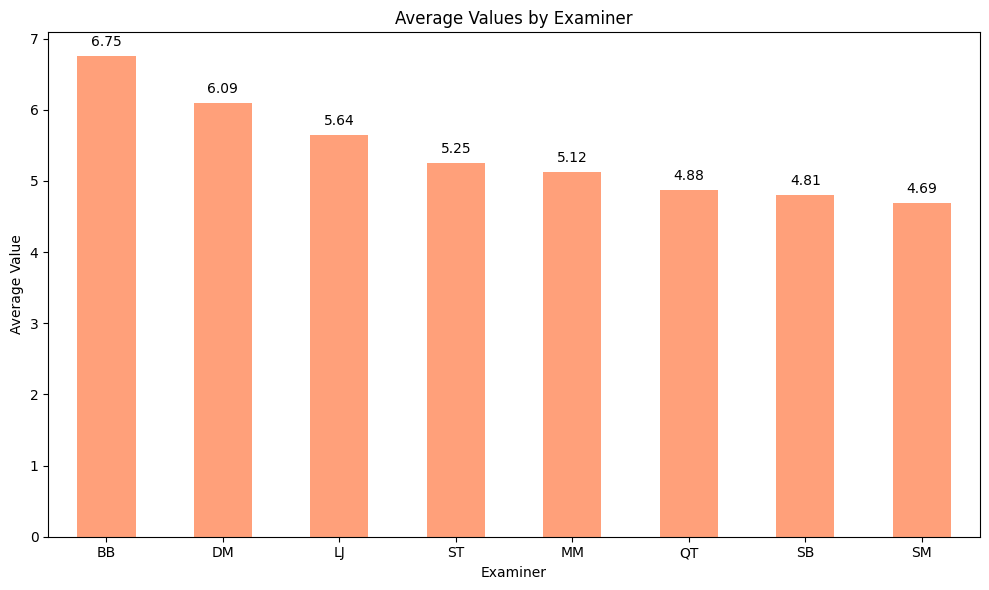

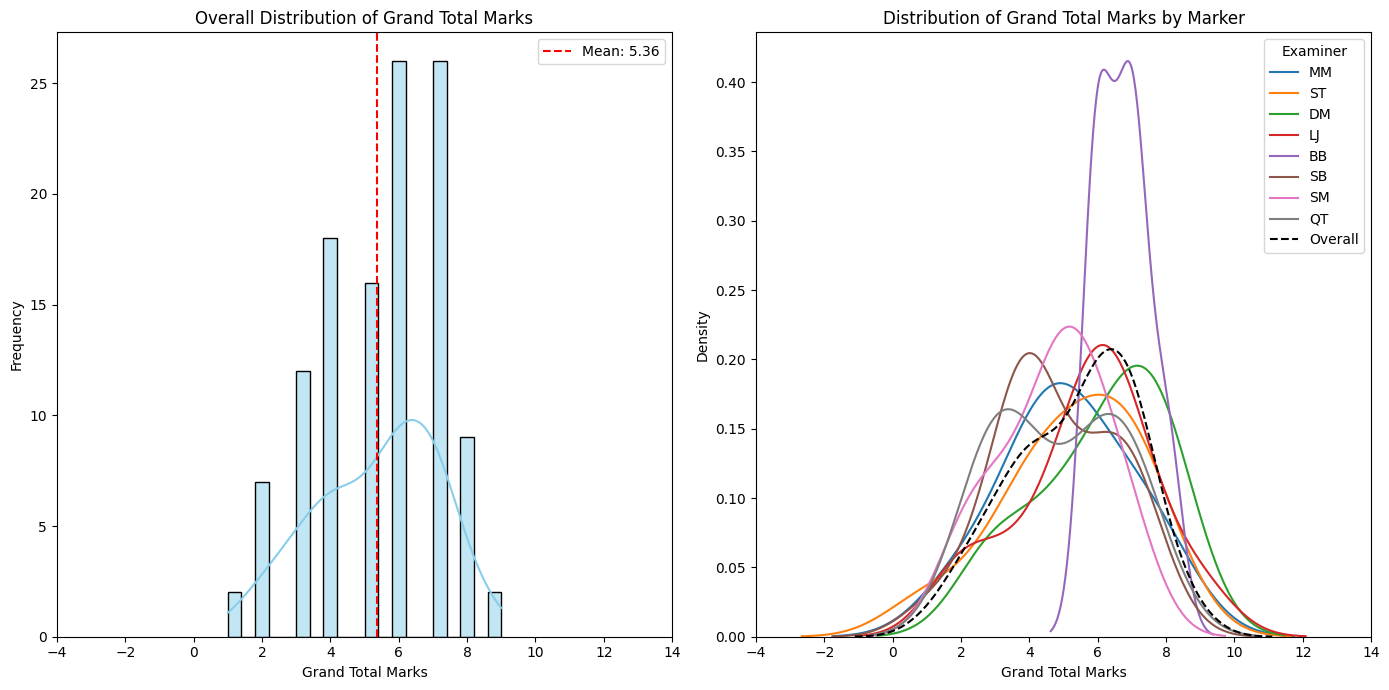

['MM' 'ST' 'DM' 'LJ' 'BB' 'SB' 'SM' 'QT']


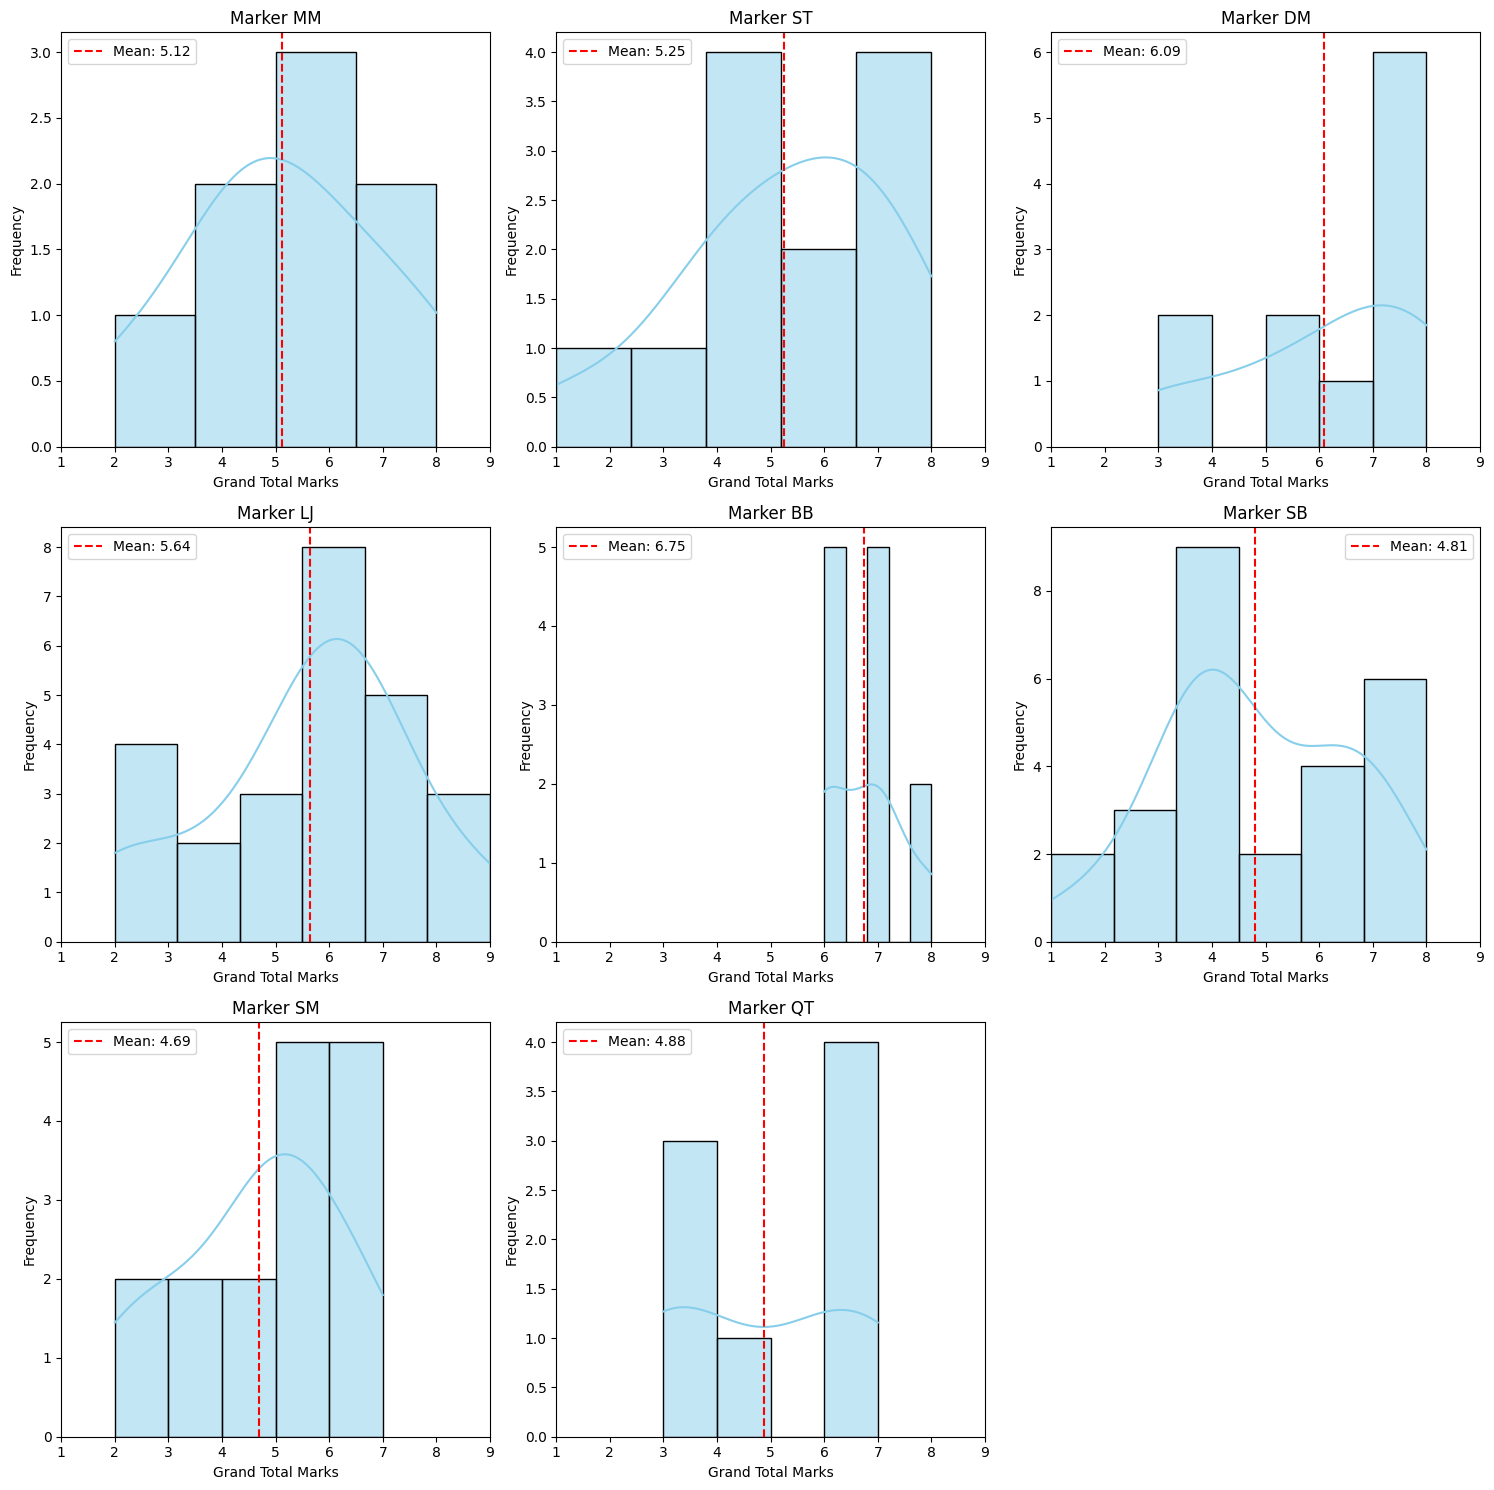

            Average  Std Deviation
Examiner                          
BB        21.916667       1.621354
DM        20.818182       3.789939
LJ        19.560000       3.428800
MM        19.875000       3.522884
QT        16.375000       3.377975
SB        18.269231       3.985551
SM        18.812500       3.229422
ST        19.916667       3.502164


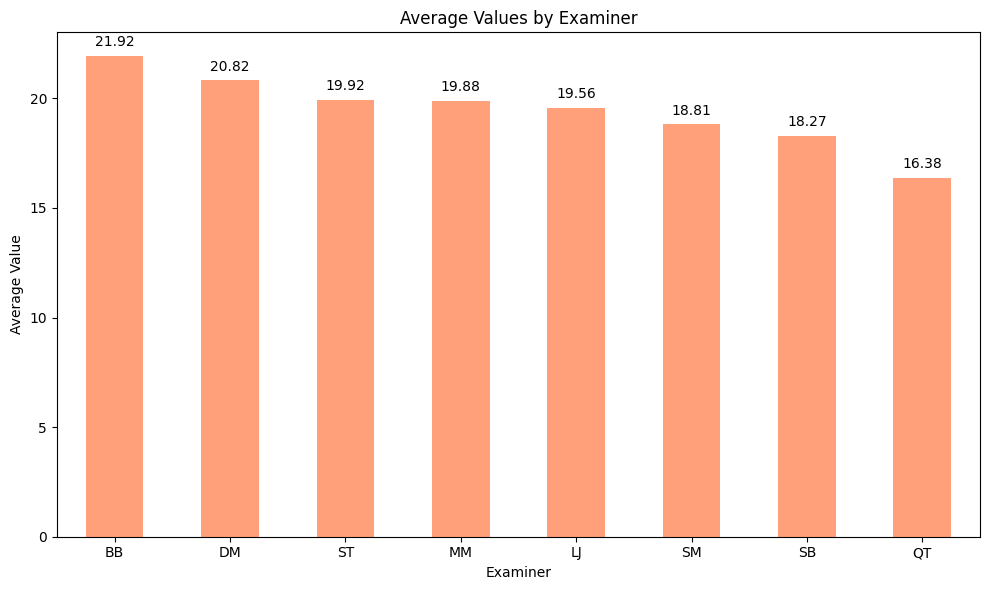

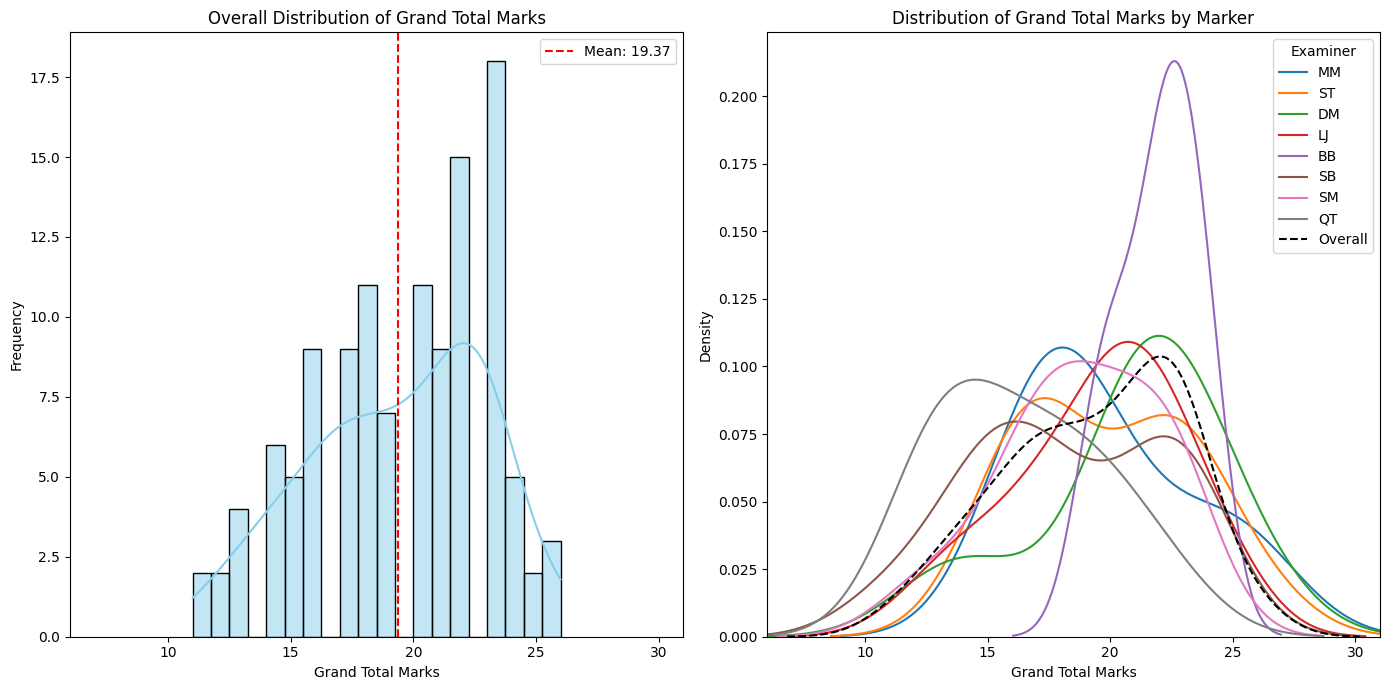

['MM' 'ST' 'DM' 'LJ' 'BB' 'SB' 'SM' 'QT']


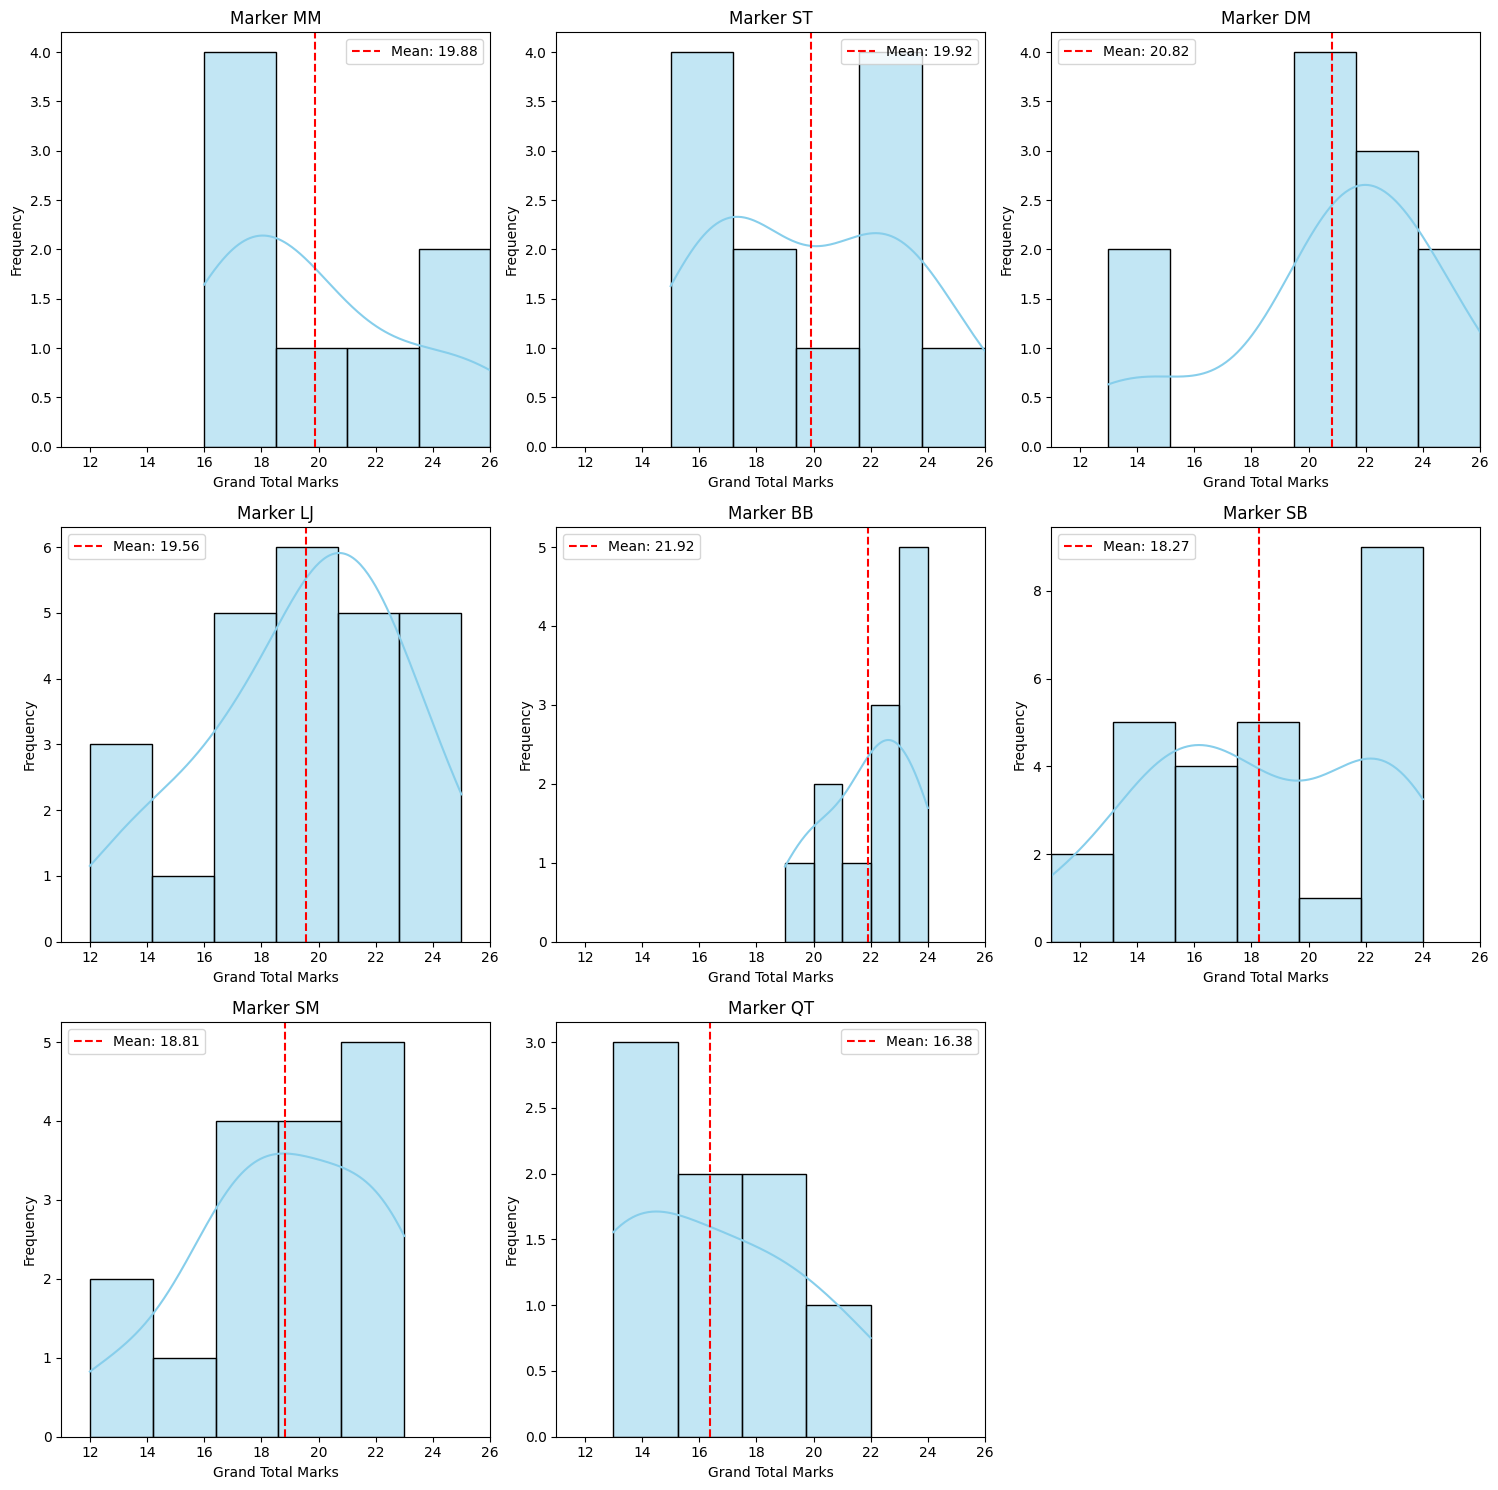

In [ ]:
# Overall aggregate, average of grand total for all
def plot_distribution(df, totalColumn='Grand Total'):
    df = df.iloc[:-1]
    overall_stats = {
        'Average': df[totalColumn].mean(),
        'Std': df[totalColumn].std()
    }
    marker_stats = df.groupby('Examiner')[totalColumn].agg(['mean', 'std']).rename(columns={'mean': 'Average', 'std': 'Std Deviation'})
    print(marker_stats)
    marker_stats = marker_stats.sort_values(by='Average', ascending=False)
    ax = marker_stats['Average'].plot(kind='bar', figsize=(10, 6), color='#FFA07A', rot=0)

    # Setting titles and labels
    plt.title('Average Values by Examiner')
    plt.xlabel('Examiner')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)  # Adjust the rotation if needed for better label visibility

    # Optional: Adding value annotations on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()  # Adjust layout to make room for label rotation if necessary
    plt.show()
    
    
    plt.figure(figsize=(14, 7))
    # Overall distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[totalColumn], kde=True, color="skyblue", bins=20)
    plt.title('Overall Distribution of Grand Total Marks')
    plt.xlabel('Grand Total Marks')
    plt.xlim(df[totalColumn].min() - 5, df[totalColumn].max() + 5)
    plt.ylabel('Frequency')
    plt.axvline(df[totalColumn].mean(), color='r', linestyle='--', label=f"Mean: {overall_stats['Average']:.2f}")
    # plt.axvline(df[totalColumn].mean() + df[totalColumn].std(), color='g', linestyle='--', label=f"+1 Std Dev: {(df[totalColumn].mean() + df[totalColumn].std()):.2f}")
    # plt.axvline(df[totalColumn].mean() - df[totalColumn].std(), color='g', linestyle='--', label=f"-1 Std Dev: {(df[totalColumn].mean() - df[totalColumn].std()):.2f}")
    plt.legend()

    plt.subplot(1, 2, 2)
    for marker in df['Examiner'].unique():
        sns.kdeplot(df[df['Examiner'] == marker][totalColumn], label=marker)
    sns.kdeplot(df[totalColumn], color='black', label='Overall', linestyle='--')
    plt.title('Distribution of Grand Total Marks by Marker')
    plt.xlabel('Grand Total Marks')
    plt.ylabel('Density')
    plt.legend(title='Examiner')
    plt.xlim(df[totalColumn].min() - 5, df[totalColumn].max() + 5)
    plt.tight_layout()
    plt.show()

    markers = df['Examiner'].unique()
    print(markers)
    n_markers = len(markers)
    n_cols = 3
    n_rows = n_markers // n_cols + (n_markers % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, marker in enumerate(markers):
        ax = axs[i // n_cols, i % n_cols]
        sns.histplot(df[df['Examiner'] == marker][totalColumn], kde=True, color="skyblue", ax=ax)
        ax.set_title(f'Marker {marker}')
        ax.set_xlabel('Grand Total Marks')
        ax.set_ylabel('Frequency')
        ax.set_xlim(df[totalColumn].min(), df[totalColumn].max())
        # Add mean line
        ax.axvline(marker_stats.loc[marker, 'Average'], color='r', linestyle='--', label=f"Mean: {marker_stats.loc[marker, 'Average']:.2f}")
        ax.legend()

    # If the number of markers is not a multiple of the number of columns, hide the empty subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()

plot_distribution(df, 'Grand Total MC')
plot_distribution(df, 'Grand Total')
# overall_stats, marker_stats

In [ ]:
allMarkers = df['Examiner'].unique()
# Extract marker MJ
for marker in allMarkers:
    dfMJ = df[df['Examiner'] == marker]
    # print(dfMJ)
    MJStudents = dfMJ['StudentID'].unique()
    # print(MJStudents)
    # Now get data for MJ students from df
    dfMJStudents = df[df['StudentID'].isin(MJStudents)]
    # print(dfMJStudents)
    MJData = dfMJStudents[dfMJStudents['Examiner'] == marker]
    otherData = dfMJStudents[dfMJStudents['Examiner'] != marker]
    print(MJData['Examiner'].unique(), otherData['Examiner'].unique())

['MM'] ['QT' 'SB']
['ST'] ['SB' 'LJ']
['DM'] ['LJ' 'QT']
['LJ'] ['DM' 'BB' 'ST' 'SM' 'SB']
['BB'] ['SB' 'LJ']
['SB'] ['MM' 'ST' 'BB' 'SM' 'LJ']
['SM'] ['LJ' 'SB']
['QT'] ['DM' 'MM']
[] []


In [ ]:
# df =df.drop(['534_R', '524_R', '534_ES', '534_PS', '534_TM', '524_ES', '524_PS', '524_TM'], axis=1)
def getWeighted(df):
    weights = [0.8, 0.1, 0.05, 0.05]
    
    cols_code1_mc = df.filter(regex=f'^{code1}_MC').columns
    cols_code2_mc = df.filter(regex=f'^{code2}_MC').columns
    cols_code1_tm = df.filter(regex=f'^{code1}_TM').columns
    cols_code2_tm = df.filter(regex=f'^{code2}_TM').columns
    cols_code1_es = df.filter(regex=f'^{code1}_ES').columns
    cols_code2_es = df.filter(regex=f'^{code2}_ES').columns
    cols_code1_ps = df.filter(regex=f'^{code1}_PS').columns
    cols_code2_ps = df.filter(regex=f'^{code2}_PS').columns
    print(len(cols_code1_mc), len(cols_code2_mc))
    tmCols = df.filter(regex=f'^{code2}_TM|^{code1}_TM').columns
    print(tmCols)
    esCols = df.filter(regex=f'^{code2}_ES|^{code1}_ES').columns 
    print(esCols)
    psCols = df.filter(regex=f'^{code2}_PS|^{code1}_PS').columns
    print(psCols)

    df[f'Weighted_{code1}'] = (df[cols_code1_mc].sum(axis=1)*weights[0]/len(cols_code1_mc) + 
                               df[cols_code1_tm].sum(axis=1)*weights[1]/3 + 
                               df[cols_code1_es].sum(axis=1)*weights[2]/4 + 
                               df[cols_code1_ps].sum(axis=1)*weights[3]/2)*100
    df[f'Weighted_{code1}'] = df[f'Weighted_{code1}'].apply(lambda x: round(x, 2))
    
    df[f'Weighted_{code2}'] = (df[cols_code2_mc].sum(axis=1)*weights[0]/len(cols_code2_mc) + 
                               df[cols_code2_tm].sum(axis=1)*weights[1]/3 + 
                               df[cols_code2_es].sum(axis=1)*weights[2]/4 + 
                               df[cols_code2_ps].sum(axis=1)*weights[3]/2)*100
    df[f'Weighted_{code2}'] = df[f'Weighted_{code2}'].apply(lambda x: round(x, 2))

    df['Weighted_average'] = (df[f'Weighted_{code1}'] + df[f'Weighted_{code2}'])/2
    df['Weighted_average'] = df['Weighted_average'].apply(lambda x: round(x, 2))

    # Penalize for critical errors by reducing the weighted score by 10%
    df[f'{code1}_penalty_10'] = df[f'Weighted_{code1}'] * df[f'{code1}_CE'].apply(lambda x: 0.9 if x == 'Yes' else 1.0)
    df[f'{code2}_penalty_10'] = df[f'Weighted_{code2}'] * df[f'{code2}_CE'].apply(lambda x: 0.9 if x == 'Yes' else 1.0)
    df['Weighted_average_penalty_10'] = (df[f'{code1}_penalty_10'] + df[f'{code2}_penalty_10'])/2
    df['Weighted_average_penalty_10'] = df['Weighted_average_penalty_10'].apply(lambda x: round(x, 2))

    # Penalize for critical errors by 20%
    df[f'{code1}_penalty_20'] = df[f'Weighted_{code1}'] * df[f'{code1}_CE'].apply(lambda x: 0.8 if x == 'Yes' else 1.0)
    df[f'{code2}_penalty_20'] = df[f'Weighted_{code2}'] * df[f'{code2}_CE'].apply(lambda x: 0.8 if x == 'Yes' else 1.0)
    df['Weighted_average_penalty_20'] = (df[f'{code1}_penalty_20'] + df[f'{code2}_penalty_20'])/2
    df['Weighted_average_penalty_20'] = df['Weighted_average_penalty_20'].apply(lambda x: round(x, 2))

    # # round the values
    # df[['Weighted_534', 'Weighted_524', 'Weighted_average', '534_penalty_10', '524_penalty_10', 'Weighted_average_penalty_10',
    #     '534_penalty_20', '524_penalty_20', 'Weighted_average_penalty_20']] = df[['Weighted_534', 'Weighted_524', 'Weighted_average', '534_penalty_10', '524_penalty_10', 'Weighted_average_penalty_10',
    #     '534_penalty_20', '524_penalty_20', 'Weighted_average_penalty_20']].round(2)

getWeighted(df_best)
comment = df_best.pop('Comments')
df_best['Comments'] = comment
saveDf(df_best, f'{dir_name}/{file_name} filtered_best_penalty.xlsx', 'Best')
df_best.tail()


6 3
Index(['524_TM-1', '578_TM-1', '524_TM-2', '578_TM-2', '524_TM-3', '578_TM-3',
       '578_TM-4', '524_TM-4'],
      dtype='object')
Index(['578_ES-1', '524_ES-1', '524_ES-2', '578_ES-2', '578_ES-3', '524_ES-3',
       '524_ES-4', '578_ES-4'],
      dtype='object')
Index(['578_PS-2', '524_PS-2', '524_PS-1', '578_PS-1', '578_PS-3', '524_PS-4',
       '524_PS-3', '578_PS-4'],
      dtype='object')
2 OR($AI2="Yes", $AJ2="Yes")
3 OR($AI3="Yes", $AJ3="Yes")
4 OR($AI4="Yes", $AJ4="Yes")
5 OR($AI5="Yes", $AJ5="Yes")
6 OR($AI6="Yes", $AJ6="Yes")
7 OR($AI7="Yes", $AJ7="Yes")
8 OR($AI8="Yes", $AJ8="Yes")
9 OR($AI9="Yes", $AJ9="Yes")
10 OR($AI10="Yes", $AJ10="Yes")
11 OR($AI11="Yes", $AJ11="Yes")
12 OR($AI12="Yes", $AJ12="Yes")
13 OR($AI13="Yes", $AJ13="Yes")
14 OR($AI14="Yes", $AJ14="Yes")
15 OR($AI15="Yes", $AJ15="Yes")
16 OR($AI16="Yes", $AJ16="Yes")
17 OR($AI17="Yes", $AJ17="Yes")
18 OR($AI18="Yes", $AJ18="Yes")
19 OR($AI19="Yes", $AJ19="Yes")
20 OR($AI20="Yes", $AJ20="Yes")
21 OR($AI21="

,578_PS-2,524_TM-1,524_PS-2,524_PS-1,578_ES-1,524_ES-1,578_PS-1,578_TM-1,524_TM-2,578_TM-2,524_MC6,524_ES-2,524_MC4,578_ES-2,578_MC3,524_MC3,578_ES-3,524_TM-3,524_ES-3,578_TM-3,578_MC1,524_MC2,578_MC2,524_MC1,524_MC5,524_ES-4,578_ES-4,578_PS-3,578_TM-4,524_PS-4,524_PS-3,524_TM-4,578_PS-4,524_CE,578_CE,Grand Total,Weighted_524,Weighted_578,Weighted_average,Weighted_average_penalty_10,Weighted_average_penalty_20,Comments
StudentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1472336,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,16.0,30.83,44.17,37.50,37.50,37.50,"524: Dental dam, matrix, bonding system were o..."
1472540,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,16.0,56.25,42.92,49.59,49.59,49.59,524: Incisal corner labial positioned which me...
1387538,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,15.0,40.83,40.83,40.83,40.83,40.83,524: some flash and voids\nincisal edge is lon...
1280725,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,14.0,50.83,37.50,44.16,44.16,44.16,524: Void at margin labially + overhang palata...
Column Total,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,57.0,57.0,57.0,56.0,56.0,56.0,50.0,47.0,47.0,47.0,47.0,47.0,47.0,46.0,34.0,28.0,25.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4489.58,4529.58,4509.58,4509.58,4509.58,NaN
